# Projeto - Machine Learning I
#### `Professor`: Alex Lima

Este documento descreve os requisitos e critérios de avaliação para projeto de Machine Learning I.

A principal finalidade deste projeto é fazer com o aluno pratique a exploração e modelagem de dados apresentados ao longo do modelo de machine learning I. Assim, durante o planejamento e desenvolvimento de seu projeto, recomenda-se visitar a ementa do módulo e mapear em seu projeto os itens previstos e lecionados em aula.

**DESAFIO**: Seu desafio neste módulo é conhecer uma área de negócio ou ciência de seu interesse e propor uma solução por meio de um modelo de machine learning. A solução deve ser apresentada prlo grupo no último dia de aula e detalhada em um report (jupyter notebook). Como referência, a equipe pode seguir os passos descritos a seguir:
 - `Introdução`
     > Descreva a área e a solução proposta em seu projeto
 - `Coleta de dados`
     > Busque ou construa um dataset relacionado ao problema que deseja solucionar.
 - `Desenvolvimento`
     > Desenvolva um modelo de machine learning, utilizando o algoritmo de sua escolha. Inclua métricas e visualizações que tornem seu modelo atrativo e compreensível para que não é da área de dados.
 - `Apresentação`
     > A apresentação deve ocorrer no último dia de aula (29/04). A equipe terá até 20 minutos para apresentar sua solução.
  
### Bons estudos! Sucesso!


####
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

####
## Funções para cálculo das métricas

In [2]:
def metricas(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"""
    AVALIAÇÃO DO MODELO - MÉTRICAS DE CLASSIFICAÇÃO
    ===============================================

    Acurácia:   {acc}
    Precisão:   {pre}
    Revocação:  {rec}
    F1-Score:   {f1}
    AUC:        {auc}
    """)

def plot_matriz_confusao(y_test, y_pred):
    conf_mtx = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_mtx, annot=True, fmt="d")
    
    plt.title("Matriz de confusão", fontsize=16, fontweight=800, y=1.05)
    plt.ylabel("Real")
    plt.xlabel("Predito")
    
    plt.show()

def plot_roc_auc(model, X_test, y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    reta = np.arange(0, 1.2, 0.2)

    plt.plot(reta, reta, linestyle="dashed")
    plt.plot(fpr, tpr, color="red")
    
    plt.margins(0, 0)
    plt.fill_between(fpr, tpr, color="#faf7cf")
    
    plt.title("Curva ROC-AUC", fontweight=800, fontsize=16, y=1.05)
    plt.xlabel("Taxa de falsos positivos")
    plt.ylabel("Taxa de verdadeiros positivos")
    plt.legend(["Chances aleatórias", "Curva ROC"])
    
    plt.show()

####
## Análise e preparação

In [3]:
df = pd.read_csv("data_telco_customer_churn.csv")

In [4]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [5]:
df.shape

(4930, 11)

In [6]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [8]:
df["Dependents"].unique().all() == df["PaperlessBilling"].unique().all() == df["Churn"].unique().all()

True

In [9]:
df_Dependents = pd.Series(np.where(df["Dependents"] == "Yes", 1, 0), name="Dependents")
df_PaperlessBilling = pd.Series(np.where(df["PaperlessBilling"] == "Yes", 1, 0), name="PaperlessBilling")
df_Churn = pd.Series(np.where(df["Churn"] == "Yes", 1, 0), name="Churn")

In [10]:
df_normalized = pd.get_dummies(
    df,
    columns=["OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract"]
)

####
## Divisão e normalização dos dados

In [11]:
X = pd.concat([df_normalized.drop(["Dependents", "PaperlessBilling", "Churn"], axis=1), df_Dependents, df_PaperlessBilling], axis=1)
y = df_Churn

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [13]:
scaler = StandardScaler().fit_transform(X_train[["tenure", "MonthlyCharges"]])

In [14]:
X_train

,tenure,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents,PaperlessBilling
4393,53,62.85,False,False,True,False,False,True,True,False,...,False,False,False,False,True,False,True,False,1,0
3736,42,78.45,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,0,1
1081,23,74.95,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,1
120,7,74.90,True,False,False,True,False,False,False,True,...,False,True,True,False,False,True,False,False,0,1
3232,2,68.95,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,34,78.30,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,1,0
3441,12,94.55,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,0
1344,1,50.75,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,0,0
4623,58,45.30,True,False,False,False,False,True,True,False,...,False,True,True,False,False,True,False,False,0,1


In [15]:
X_train["tenure"] = scaler[:, 0]
X_train["MonthlyCharges"] = scaler[:, 1]

In [16]:
X_train

,tenure,MonthlyCharges,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents,PaperlessBilling
4393,0.829169,-0.075025,False,False,True,False,False,True,True,False,...,False,False,False,False,True,False,True,False,1,0
3736,0.380798,0.443872,True,False,False,True,False,False,True,False,...,False,True,False,False,True,False,False,True,0,1
1081,-0.393661,0.327453,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,1
120,-1.045837,0.325790,True,False,False,True,False,False,False,True,...,False,True,True,False,False,True,False,False,0,1
3232,-1.249642,0.127877,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.054710,0.438882,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,1,0
3441,-0.842032,0.979400,True,False,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,0,0
1344,-1.290403,-0.477503,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,0,0
4623,1.032974,-0.658784,True,False,False,False,False,True,True,False,...,False,True,True,False,False,True,False,False,0,1


In [17]:
X.columns

Index(['tenure', 'MonthlyCharges', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Dependents', 'PaperlessBilling'],
      dtype='object')

####
## Treinamento
## Modelo 1 - Regressão Logística

In [18]:
model_logreg = LogisticRegression(max_iter=1_000).fit(X_train, y_train)

In [19]:
y_pred = model_logreg.predict(X_test)

In [20]:
metricas(y_test, y_pred)


    AVALIAÇÃO DO MODELO - MÉTRICAS DE CLASSIFICAÇÃO

    Acurácia:   0.6558485463150777
    Precisão:   0.43530834340991537
    Revocação:  0.8955223880597015
    F1-Score:   0.5858421480878763
    AUC:        0.7309552515971673
    


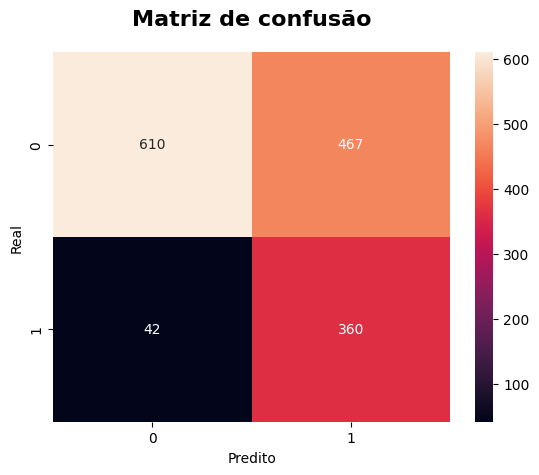

In [21]:
plot_matriz_confusao(y_test, y_pred)

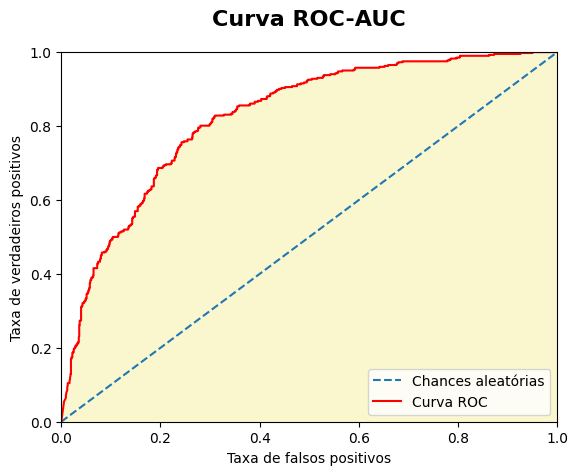

In [22]:
plot_roc_auc(model_logreg, X_test, y_test, y_pred)

####
## Modelo 2 - Árvore de decisão

In [23]:
model_dectree = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
y_pred = model_dectree.predict(X_test)

In [25]:
metricas(y_test, y_pred)


    AVALIAÇÃO DO MODELO - MÉTRICAS DE CLASSIFICAÇÃO

    Acurácia:   0.6795131845841785
    Precisão:   0.15384615384615385
    Revocação:  0.03980099502487562
    F1-Score:   0.06324110671936758
    AUC:        0.479046272814202
    


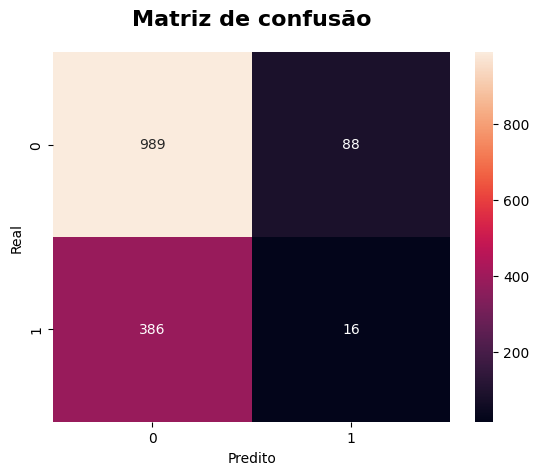

In [26]:
plot_matriz_confusao(y_test, y_pred)

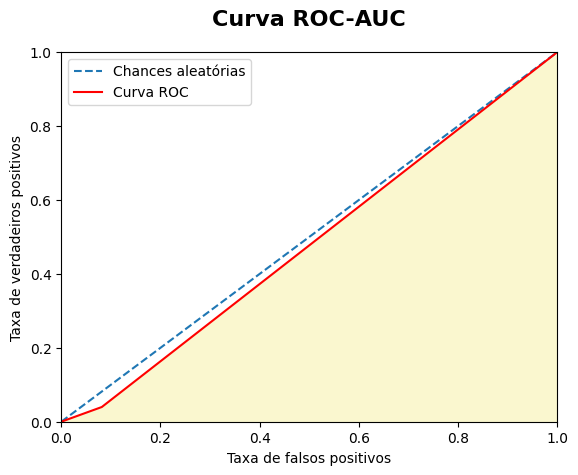

In [27]:
plot_roc_auc(model_dectree, X_test, y_test, y_pred)

####
## Modelo 3 - Random Forest

In [28]:
model_randtree = RandomForestClassifier().fit(X_train, y_train)

In [29]:
y_pred = model_randtree.predict(X_test)

In [30]:
metricas(y_test, y_pred)


    AVALIAÇÃO DO MODELO - MÉTRICAS DE CLASSIFICAÇÃO

    Acurácia:   0.7376605814739688
    Precisão:   0.5324074074074074
    Revocação:  0.2860696517412935
    F1-Score:   0.37216828478964403
    AUC:        0.5961453179783534
    


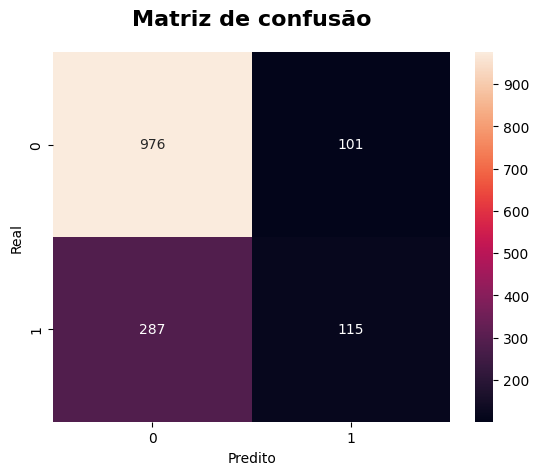

In [31]:
plot_matriz_confusao(y_test, y_pred)

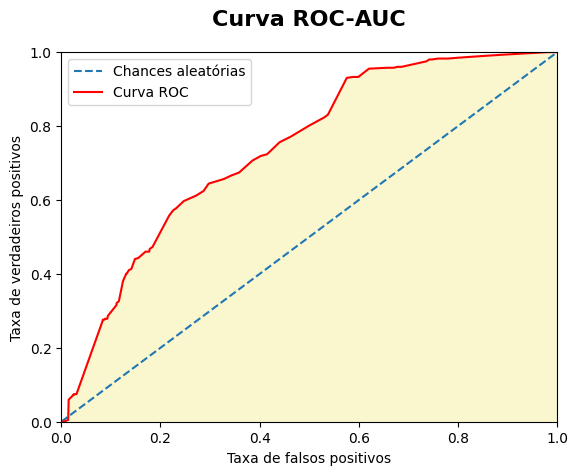

In [32]:
plot_roc_auc(model_randtree, X_test, y_test, y_pred)